### Model exercises
Using the titanic data, in your classification-exercises repository, create a notebook, model.ipynb where you will do the following:
1. What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.
2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)
3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.
4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.
5. Run through steps 2-4 using a different max_depth value.
6. Which model performs better on your in-sample data?
7. Which model performs best on your out-of-sample data, the validate set?
8. Work through these same exercises using the Telco dataset.

In [60]:
# Env Set up
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import acquire as acq
import prepare as pp
# Decision Tree and Model Evaluation Imports
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

In [2]:
titanic = acq.get_titanic_data()

Using cached csv


In [3]:
titanic = pp.prep_titanic(titanic)

Using cached csv
Data cleaned for duplicates, columns dropped [deck, embarked, class, age], filled na, and added numerical versions of sex and embark


In [7]:
titanic.shape

(891, 12)

In [5]:
train, validate, test = pp.train_validate_test_split(titanic, target = 'survived')

In [6]:
train.shape, validate.shape, test.shape

((498, 12), (214, 12), (179, 12))

In [8]:
# What is your baseline prediction? 
train.survived.value_counts()

0    307
1    191
Name: survived, dtype: int64

In [10]:
# baseline accuracy
train['baseline'] = 0
print(f' Baseline accuracy is: {(train.survived==train.baseline).mean():.2%}')

 Baseline accuracy is: 61.65%


1. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 583 to 744
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   passenger_id             498 non-null    int64  
 1   survived                 498 non-null    int64  
 2   pclass                   498 non-null    int64  
 3   sex                      498 non-null    object 
 4   sibsp                    498 non-null    int64  
 5   parch                    498 non-null    int64  
 6   fare                     498 non-null    float64
 7   embark_town              498 non-null    object 
 8   alone                    498 non-null    int64  
 9   sex_male                 498 non-null    uint8  
 10  embark_town_Queenstown   498 non-null    uint8  
 11  embark_town_Southampton  498 non-null    uint8  
 12  baseline                 498 non-null    int64  
dtypes: float64(1), int64(7), object(2), uint8(3)
memory usage: 44.3+ KB


In [12]:
# Feature selection
features = ['pclass', 'embark_town_Queenstown', 'embark_town_Southampton', 'sex_male']

In [13]:
# Variables
x_train = train[features]
y_train = train[['survived']]

x_validate = validate[features]
y_validate = validate[['survived']]

x_test = test[features]
y_test = test[['survived']]

In [14]:
x_train.head()

,pclass,embark_town_Queenstown,embark_town_Southampton,sex_male
583,1,0,0,1
165,3,0,1,1
50,3,0,1,1
259,2,0,1,0
306,1,0,0,0


In [15]:
y_train[:5]

,survived
583,0
165,1
50,0
259,1
306,1


In [16]:
y_train.value_counts()

survived
0           307
1           191
dtype: int64

In [17]:
tree = DecisionTreeClassifier(max_depth = 3)

In [18]:
tree= tree.fit(x_train,y_train)

In [19]:
y_pred = tree.predict(x_train)

In [23]:
internet_service_type
print(export_text(tree, feature_names=x_train.columns.tolist()))

|--- sex_male <= 0.50
|   |--- pclass <= 2.50
|   |   |--- embark_town_Southampton <= 0.50
|   |   |   |--- class: 1
|   |   |--- embark_town_Southampton >  0.50
|   |   |   |--- class: 1
|   |--- pclass >  2.50
|   |   |--- embark_town_Southampton <= 0.50
|   |   |   |--- class: 1
|   |   |--- embark_town_Southampton >  0.50
|   |   |   |--- class: 0
|--- sex_male >  0.50
|   |--- pclass <= 1.50
|   |   |--- embark_town_Queenstown <= 0.50
|   |   |   |--- class: 0
|   |   |--- embark_town_Queenstown >  0.50
|   |   |   |--- class: 0
|   |--- pclass >  1.50
|   |   |--- pclass <= 2.50
|   |   |   |--- class: 0
|   |   |--- pclass >  2.50
|   |   |   |--- class: 0



In [35]:
# Evaluate your in-sample results using the model score, confusion matrix, and classification report.
print(f'Accuracy score on training set is: {tree.score(x_train,y_train):.2%}')

Accuracy score on training set is: 81.93%


In [37]:
labels = sorted(y_train.survived.unique())
pd.DataFrame(confusion_matrix(y_train, y_pred), index = labels, columns = labels)

,0,1
0,294,13
1,77,114


In [38]:
# rows are truth, columns are pred
tn, fp, fn, tp = confusion_matrix(y_train, y_pred).ravel()
(tn, fp, fn, tp)

(294, 13, 77, 114)

In [39]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.96      0.87       307
           1       0.90      0.60      0.72       191

    accuracy                           0.82       498
   macro avg       0.85      0.78      0.79       498
weighted avg       0.83      0.82      0.81       498



Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [42]:
# Formulas
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp/(tp+fp) 
recall = tp/(tp+fn)
f1 = (2* precision * recall)/(precision + recall)

In [48]:
# Written out answers
print(f"False positive rate: {fp/(fp+tn):.2%}")
print(f"False negative rate: {fn/(fn+tp):.2%}")
print(f"True positive rate: {tp/(tp+fn):.2%}")
print(f"True negative rate: {tn/(fp+tn):.2%}")
print(f"Accuracy rate: {(tp + tn) / (tp + tn + fp + fn):.2%}")
print(f"Precision rate: {precision:.2%}")
print(f"Recall rate: {recall:.2%}")
print(f"F1 score: {f1: .2%}")


False positive rate: 4.23%
False negative rate: 40.31%
True positive rate: 59.69%
True negative rate: 95.77%
Accuracy rate: 81.93%
Precision rate: 89.76%
Recall rate: 59.69%
F1 score:  71.70%


Run through steps 2-4 using a different max_depth value.

In [49]:
def decision_tree(train, d = 5, print_results = True):
    
    selected_features = ['pclass','embark_town_Queenstown','embark_town_Southampton','sex_male']
    X_train = train[selected_features]
    y_train = train[['survived']]
    ship = DecisionTreeClassifier(max_depth=d, random_state=123)
    ship = ship.fit(X_train, y_train)
    y_pred = ship.predict(X_train)
    if print_results:
        print("TRAINING RESULTS")
        print("----------------")
        print(f"Accuracy score on training set is: {ship.score(X_train, y_train):.2f}")
        print(classification_report(y_train, y_pred))

        tn, fp, fn, tp = confusion_matrix(y_train, y_pred).ravel()

        print(f"False positive rate: {fp/(fp+tn):.2%}")
        print(f"False negative rate: {fn/(fn+tp):.2%}")
        print(f"True positive rate: {tp/(tp+fn):.2%}")
        print(f"True negative rate: {tn/(fp+tn):.2%}")
        print("----------------")
    
    return ship

In [50]:
for i in[3,5]:
    print(f'For decision tree with depth{i}:')
    decision_tree(train, d=i)

For decision tree with depth3:
TRAINING RESULTS
----------------
Accuracy score on training set is: 0.82
              precision    recall  f1-score   support

           0       0.79      0.96      0.87       307
           1       0.90      0.60      0.72       191

    accuracy                           0.82       498
   macro avg       0.85      0.78      0.79       498
weighted avg       0.83      0.82      0.81       498

False positive rate: 4.23%
False negative rate: 40.31%
True positive rate: 59.69%
True negative rate: 95.77%
----------------
For decision tree with depth5:
TRAINING RESULTS
----------------
Accuracy score on training set is: 0.82
              precision    recall  f1-score   support

           0       0.79      0.96      0.87       307
           1       0.90      0.60      0.72       191

    accuracy                           0.82       498
   macro avg       0.85      0.78      0.79       498
weighted avg       0.83      0.82      0.81       498

False posi

## Which model performs better on your in-sample data?
### Takeaway:
-  Depth 3 and 5 are identical

### Which model performs best on your out-of-sample data, the validate set?

In [56]:
def validate_results(d):
    ship = decision_tree(train, d = d, print_results = False)
    print('')
    print(f'For decision tree of depth: {ship.max_depth}')
    print('VALIDATE RESULTS')
    print('Accuracy of Decision Tree classifier on validate set: {:.2f}'
         .format(ship.score(x_validate, y_validate)))


    # Produce y_predictions that come from the X_validate
    y_pred = ship.predict(x_validate)

    # Compare actual y values (from validate) to predicted y_values from the model run on X_validate
    print(classification_report(y_validate, y_pred))

In [57]:
for i in [3,5]:
    validate_results(i)


For decision tree of depth: 3
VALIDATE RESULTS
Accuracy of Decision Tree classifier on validate set: 0.79
              precision    recall  f1-score   support

           0       0.77      0.95      0.85       132
           1       0.88      0.54      0.67        82

    accuracy                           0.79       214
   macro avg       0.82      0.75      0.76       214
weighted avg       0.81      0.79      0.78       214


For decision tree of depth: 5
VALIDATE RESULTS
Accuracy of Decision Tree classifier on validate set: 0.79
              precision    recall  f1-score   support

           0       0.77      0.95      0.85       132
           1       0.88      0.54      0.67        82

    accuracy                           0.79       214
   macro avg       0.82      0.75      0.76       214
weighted avg       0.81      0.79      0.78       214



### Takeaways:
- Depth 3 and 5 are identical

### Work through these same exercises using the Telco dataset.
- See Telco_modeling notebook

## Exercises Random Forest


Continue working in your `model` file with titanic data to do the following: 

1. Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.

1. Evaluate your results using the model score, confusion matrix, and classification report.

1. Print and clearly label the following:  Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

1. Run through steps increasing your min_samples_leaf and decreasing your max_depth. 

1. What are the differences in the evaluation metrics?  Which performs better on your in-sample data?  Why?

After making a few models, which one has the best performance (or closest metrics) on both train and validate?

In [61]:
df=acq.get_titanic_data()

Using cached csv


In [62]:
df.shape

(891, 13)

In [63]:
df=df.drop(columns = ['passenger_id', 'deck','embarked','class'])

In [64]:
df.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,Southampton,0
1,1,1,female,38.0,1,0,71.2833,Cherbourg,0


In [65]:
df=df.dropna()
df.shape

(712, 9)

In [66]:
df = pd.get_dummies(df,columns = ['embark_town','sex'], drop_first = True)

In [69]:
train, validate, test = pp.train_validate_test_split(df, target='survived')
train.shape, validate.shape, test.shape

((398, 10), (171, 10), (143, 10))

In [70]:
train['baseline'] = 0

In [73]:
print(f'Baseline accuracy is: {(train.survived == train.baseline).mean():.2%}')

Baseline accuracy is: 59.55%


In [74]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 398 entries, 450 to 749
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   survived                 398 non-null    int64  
 1   pclass                   398 non-null    int64  
 2   age                      398 non-null    float64
 3   sibsp                    398 non-null    int64  
 4   parch                    398 non-null    int64  
 5   fare                     398 non-null    float64
 6   alone                    398 non-null    int64  
 7   embark_town_Queenstown   398 non-null    uint8  
 8   embark_town_Southampton  398 non-null    uint8  
 9   sex_male                 398 non-null    uint8  
 10  baseline                 398 non-null    int64  
dtypes: float64(2), int64(6), uint8(3)
memory usage: 29.2 KB


In [75]:
features = ['pclass','embark_town_Queenstown', 'embark_town_Southampton','sex_male']

In [76]:
def x_and_y(train, validate, test, features, target):
    x_train = train[features]
    y_train = train[target]
    
    x_validate = validate[features]
    y_validate = validate[target]
    
    x_test = test[features]
    y_test = test[target]
    
    return {'x_train': x_train, 'y_train': y_train, 'x_validate': x_validate, 'y_validate': y_validate, 'x_test': x_test, 'y_test': y_test}
    

In [77]:
x_and_y(train,validate,test,features, target = 'survived')

{'x_train':      pclass  embark_town_Queenstown  embark_town_Southampton  sex_male
 450       2                       0                        1         1
 543       2                       0                        1         1
 157       3                       0                        1         1
 462       1                       0                        1         1
 397       2                       0                        1         1
 ..      ...                     ...                      ...       ...
 820       1                       0                        1         0
 673       2                       0                        1         1
 310       1                       0                        0         0
 72        2                       0                        1         1
 749       3                       1                        0         1
 
 [398 rows x 4 columns],
 'y_train': 450    0
 543    1
 157    0
 462    0
 397    0
       ..
 820    1
 673    1
 310   

In [78]:
x_train

,pclass,embark_town_Queenstown,embark_town_Southampton,sex_male
583,1,0,0,1
165,3,0,1,1
50,3,0,1,1
259,2,0,1,0
306,1,0,0,0
...,...,...,...,...
313,3,0,1,1
636,3,0,1,1
222,3,0,1,1
485,3,0,1,0


In [79]:
y_train

,survived
583,0
165,1
50,0
259,1
306,1
...,...
313,0
636,0
222,0
485,0


### Train Model

In [85]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


from pydataset import data

In [82]:
rf = RandomForestClassifier(max_depth=3, 
                            random_state=123)

In [83]:
# Fit the model
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=3, random_state=123)

In [86]:
# Feature importance
print(rf.feature_importances_)

[0.2549494  0.02162778 0.03081401 0.69260881]


In [87]:
y_pred = rf.predict(x_train)
y_pred

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [88]:
y_pred_proba = rf.predict_proba(x_train)
y_pred_proba

array([[0.64691191, 0.35308809],
       [0.87617731, 0.12382269],
       [0.87617731, 0.12382269],
       [0.09916049, 0.90083951],
       [0.06618338, 0.93381662],
       [0.74993003, 0.25006997],
       [0.78508208, 0.21491792],
       [0.78508208, 0.21491792],
       [0.87075847, 0.12924153],
       [0.5901263 , 0.4098737 ],
       [0.5901263 , 0.4098737 ],
       [0.65184688, 0.34815312],
       [0.09916049, 0.90083951],
       [0.65184688, 0.34815312],
       [0.78508208, 0.21491792],
       [0.87617731, 0.12382269],
       [0.87617731, 0.12382269],
       [0.25481767, 0.74518233],
       [0.78508208, 0.21491792],
       [0.5901263 , 0.4098737 ],
       [0.5901263 , 0.4098737 ],
       [0.87617731, 0.12382269],
       [0.08150039, 0.91849961],
       [0.08150039, 0.91849961],
       [0.65184688, 0.34815312],
       [0.87617731, 0.12382269],
       [0.08451577, 0.91548423],
       [0.06618338, 0.93381662],
       [0.65184688, 0.34815312],
       [0.78508208, 0.21491792],
       [0.

### Evaluation Model

In [90]:
# Compute Accuracy
print('Accuracy of random forest classifier on traing set: {:.2f}'.format(rf.score(x_train, y_train)))

Accuracy of random forest classifier on traing set: 0.82


In [91]:
# Confusion Matrix
print(confusion_matrix(y_train,y_pred))

[[294  13]
 [ 77 114]]


In [92]:
# Print and clearly label the following: Accuracy, true positive rate, false positive rate,
# true negative rate, false negative rate, precision, recall, f1-score, and support.
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.96      0.87       307
           1       0.90      0.60      0.72       191

    accuracy                           0.82       498
   macro avg       0.85      0.78      0.79       498
weighted avg       0.83      0.82      0.81       498



### Validate Model

In [93]:
print('Accuracy of random forest classifier on test test: {:.2f}'
     .format(rf.score(x_validate,y_validate)))

Accuracy of random forest classifier on test test: 0.79


### Now looking at directions instead of following lesson example:

Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.

In [120]:
# Try to build a function...
def random_forest(train, validate,features , min_samples_leaf, d, print_results = True):
    
    X_train = train[features]
    y_train = train[['survived']]
    rf = RandomForestClassifier(max_depth=d, min_samples_leaf=min_samples_leaf, random_state=123)
    # Fit
    rf = rf.fit(X_train, y_train['survived'])
    
    # Predict
    y_pred = rf.predict(X_train)
    
    # Results
    tn, fp, fn, tp = confusion_matrix(y_train, y_pred).ravel()
    if print_results:
        print("TRAINING RESULTS")
        print("----------------")
        # Feature importance
        print(f"Feature importance:\n{dict(zip(features,rf.feature_importances_))}")
        print(f"Accuracy of random forest classifer on training set: {rf.score(X_train, y_train):.2%}")
        print(classification_report(y_train, y_pred))

        
        print("Confusion matrix: rows are truth, columns are pred")
        print("")
        print(confusion_matrix(y_train, y_pred))
        print("")
        print(f"False positive rate: {fp/(fp+tn):.2%}")
        print(f"False negative rate: {fn/(fn+tp):.2%}")
        print(f"True positive rate: {tp/(tp+fn):.2%}")
        print(f"True negative rate: {tn/(fp+tn):.2%}")
        print("----------------")
    train_report = classification_report(y_train, y_pred, output_dict=True)
    ### Predict for Validate 
    y_pred_val = rf.predict(validate[features])
    ### Classification report
    validate_report = classification_report(validate[['survived']],y_pred_val, output_dict=True)
    if print_results:
        print("VALIDATE RESULTS")
        print("----------------")
        print(classification_report(validate[['survived']],y_pred_val))
    reports = {'train':train_report,'validate':validate_report}
    return reports

In [122]:
features = ['pclass','embark_town_Queenstown', 'embark_town_Southampton','sex_male']
random_forest(train,validate,features,1,10,True)

TRAINING RESULTS
----------------
Feature importance:
{'pclass': 0.31157122794183023, 'embark_town_Queenstown': 0.027475321223680762, 'embark_town_Southampton': 0.042824936023002885, 'sex_male': 0.6181285148114861}
Accuracy of random forest classifer on training set: 80.40%
              precision    recall  f1-score   support

           0       0.79      0.92      0.85       237
           1       0.84      0.64      0.73       161

    accuracy                           0.80       398
   macro avg       0.81      0.78      0.79       398
weighted avg       0.81      0.80      0.80       398

Confusion matrix: rows are truth, columns are pred

[[217  20]
 [ 58 103]]

False positive rate: 8.44%
False negative rate: 36.02%
True positive rate: 63.98%
True negative rate: 91.56%
----------------
VALIDATE RESULTS
----------------
              precision    recall  f1-score   support

           0       0.74      0.92      0.82       102
           1       0.82      0.52      0.64        69

{'train': {'0': {'precision': 0.7890909090909091,
   'recall': 0.9156118143459916,
   'f1-score': 0.8476562499999999,
   'support': 237},
  '1': {'precision': 0.8373983739837398,
   'recall': 0.639751552795031,
   'f1-score': 0.7253521126760563,
   'support': 161},
  'accuracy': 0.8040201005025126,
  'macro avg': {'precision': 0.8132446415373245,
   'recall': 0.7776816835705114,
   'f1-score': 0.786504181338028,
   'support': 398},
  'weighted avg': {'precision': 0.8086323710199185,
   'recall': 0.8040201005025126,
   'f1-score': 0.7981814607810177,
   'support': 398}},
 'validate': {'0': {'precision': 0.7401574803149606,
   'recall': 0.9215686274509803,
   'f1-score': 0.8209606986899565,
   'support': 102},
  '1': {'precision': 0.8181818181818182,
   'recall': 0.5217391304347826,
   'f1-score': 0.6371681415929203,
   'support': 69},
  'accuracy': 0.7602339181286549,
  'macro avg': {'precision': 0.7791696492483895,
   'recall': 0.7216538789428815,
   'f1-score': 0.7290644201414385,
   

In [136]:
for i in range (2,11):
    rfc = RandomForestClassifier(max_depth=i, random_state=123)
    rfc = rfc.fit(x_train,y_train)
    #predictions
    y_pred = rfc.predict(x_train)
    # Classification loop
    report = classification_report(y_train, y_pred, output_dict=True)
    print(f'Tree with max depth of {i}')
    print(pd.DataFrame(report))
    print()
          

Tree with max depth of 2
                    0           1  accuracy   macro avg  weighted avg
precision    0.820433    0.760000  0.799197    0.790217      0.797255
recall       0.863192    0.696335  0.799197    0.779764      0.799197
f1-score     0.841270    0.726776  0.799197    0.784023      0.797358
support    307.000000  191.000000  0.799197  498.000000    498.000000

Tree with max depth of 3
                    0           1  accuracy   macro avg  weighted avg
precision    0.792453    0.897638  0.819277    0.845045      0.832795
recall       0.957655    0.596859  0.819277    0.777257      0.819277
f1-score     0.867257    0.716981  0.819277    0.792119      0.809621
support    307.000000  191.000000  0.819277  498.000000    498.000000

Tree with max depth of 4
                    0           1  accuracy   macro avg  weighted avg
precision    0.792453    0.897638  0.819277    0.845045      0.832795
recall       0.957655    0.596859  0.819277    0.777257      0.819277
f1-score     

In [137]:
# Copied from decision tree lesson & updted with random forest classifier
metrics = []

for i in range(1, 25):
    # Make the model
    rfc = RandomForestClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    rfc = rfc.fit(x_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = rfc.score(x_train, y_train)
    
    out_of_sample_accuracy = rfc.score(x_validate, y_validate)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,max_depth,train_accuracy,validate_accuracy,difference
0,1,0.799197,0.761682,0.037515
1,2,0.799197,0.761682,0.037515
2,3,0.819277,0.794393,0.024885
3,4,0.819277,0.794393,0.024885
4,5,0.819277,0.794393,0.024885
5,6,0.819277,0.794393,0.024885
6,7,0.819277,0.794393,0.024885
7,8,0.819277,0.794393,0.024885
8,9,0.819277,0.794393,0.024885
9,10,0.819277,0.794393,0.024885


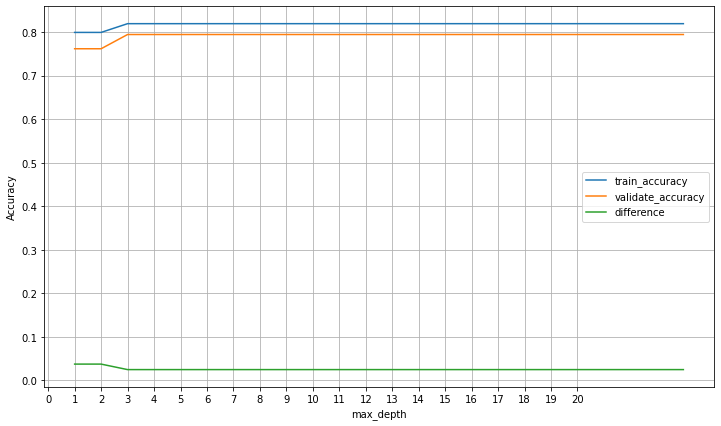

In [141]:
df.set_index('max_depth').plot(figsize = (12,7))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,21,1))
plt.grid()